In [2]:
# Install the KAN library if you haven't already:
# !pip install git+https://github.com/KindXiaoming/pykan.git

from kan import KAN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

import kan
from kan.utils import create_dataset , create_dataset_from_data



# 2 Generate Data

## for constant u and a

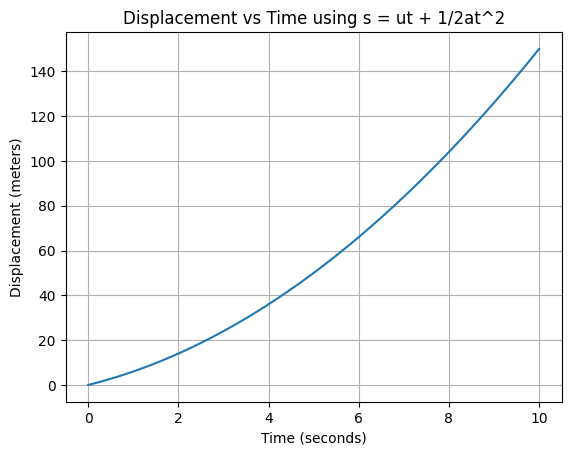

Time: 0.0 sec, Displacement: 0.00 m
Time: 0.1 sec, Displacement: 0.52 m
Time: 0.2 sec, Displacement: 1.05 m
Time: 0.3 sec, Displacement: 1.61 m
Time: 0.4 sec, Displacement: 2.18 m
Time: 0.5 sec, Displacement: 2.78 m
Time: 0.6 sec, Displacement: 3.40 m
Time: 0.7 sec, Displacement: 4.04 m
Time: 0.8 sec, Displacement: 4.69 m
Time: 0.9 sec, Displacement: 5.37 m
Time: 1.0 sec, Displacement: 6.07 m
Time: 1.1 sec, Displacement: 6.79 m
Time: 1.2 sec, Displacement: 7.53 m
Time: 1.3 sec, Displacement: 8.29 m
Time: 1.4 sec, Displacement: 9.07 m
Time: 1.5 sec, Displacement: 9.87 m
Time: 1.6 sec, Displacement: 10.69 m
Time: 1.7 sec, Displacement: 11.53 m
Time: 1.8 sec, Displacement: 12.40 m
Time: 1.9 sec, Displacement: 13.28 m
Time: 2.0 sec, Displacement: 14.18 m
Time: 2.1 sec, Displacement: 15.11 m
Time: 2.2 sec, Displacement: 16.05 m
Time: 2.3 sec, Displacement: 17.01 m
Time: 2.4 sec, Displacement: 18.00 m
Time: 2.5 sec, Displacement: 19.00 m
Time: 2.6 sec, Displacement: 20.03 m
Time: 2.7 sec, Di

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
u = 5  # Initial velocity (m/s)
a = 2  # Acceleration (m/s^2)

# Generate time values from 0 to 10 seconds with 0.1 second intervals
t = np.linspace(0, 10, 100)

# Calculate displacement using the equation s = ut + 1/2 at^2
s = u * t + 0.5 * a * t**2

# Plotting the data
plt.plot(t, s)
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.title("Displacement vs Time using s = ut + 1/2at^2")
plt.grid(True)
plt.show()

# Displaying the generated data
for time, displacement in zip(t, s):
    print(f"Time: {time:.1f} sec, Displacement: {displacement:.2f} m")


In [9]:
# Create a DataFrame with the variables
df = pd.DataFrame({
    't': t,
    'u': u,
    'a': a,
    's': s
})

# Save the DataFrame to a CSV file
df.to_csv('../data/phy_data_1.csv', index=False)

## for variable u and a

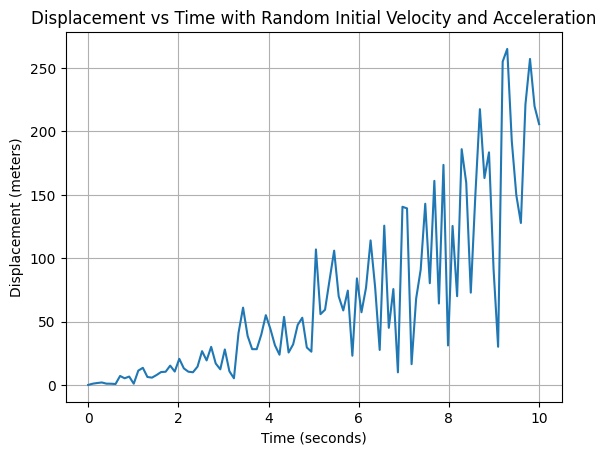

Time: 0.0 sec, u: 3.75 m/s, a: 0.16 m/s^2, Displacement: 0.00 m
Time: 0.1 sec, u: 9.51 m/s, a: 3.18 m/s^2, Displacement: 0.98 m
Time: 0.2 sec, u: 7.32 m/s, a: 1.57 m/s^2, Displacement: 1.51 m
Time: 0.3 sec, u: 5.99 m/s, a: 2.54 m/s^2, Displacement: 1.93 m
Time: 0.4 sec, u: 1.56 m/s, a: 4.54 m/s^2, Displacement: 1.00 m
Time: 0.5 sec, u: 1.56 m/s, a: 1.25 m/s^2, Displacement: 0.95 m
Time: 0.6 sec, u: 0.58 m/s, a: 2.05 m/s^2, Displacement: 0.73 m
Time: 0.7 sec, u: 8.66 m/s, a: 3.78 m/s^2, Displacement: 7.07 m
Time: 0.8 sec, u: 6.01 m/s, a: 1.14 m/s^2, Displacement: 5.23 m
Time: 0.9 sec, u: 7.08 m/s, a: 0.38 m/s^2, Displacement: 6.60 m


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random values for initial velocity (u) and acceleration (a) for each time step
np.random.seed(42)  # For reproducibility
u = np.random.uniform(0, 10, 100)  # Random initial velocities between 0 and 10 m/s
a = np.random.uniform(0, 5, 100)   # Random accelerations between 0 and 5 m/s^2

# Generate time values from 0 to 10 seconds with 0.1 second intervals
t = np.linspace(0, 10, 100)

# Calculate displacement using the equation s = ut + 1/2 at^2
s = u * t + 0.5 * a * t**2

# Plotting the data
plt.plot(t, s)
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.title("Displacement vs Time with Random Initial Velocity and Acceleration")
plt.grid(True)
plt.show()

# Displaying the generated data for the first 10 points
for i in range(10):
    print(f"Time: {t[i]:.1f} sec, u: {u[i]:.2f} m/s, a: {a[i]:.2f} m/s^2, Displacement: {s[i]:.2f} m")


In [13]:
# Create a DataFrame with the variables
df = pd.DataFrame({
    't': t,
    'u': u,
    'a': a,
    's': s
})

# Save the DataFrame to a CSV file
df.to_csv('../data/phy_data_2.csv', index=False)

In [14]:
df

,t,u,a,s
0,0.00000,3.745401,0.157146,0.000000
1,0.10101,9.507143,3.182052,0.976551
2,0.20202,7.319939,1.571780,1.510850
3,0.30303,5.986585,2.542853,1.930868
4,0.40404,1.560186,4.537832,1.000776
...,...,...,...,...
95,9.59596,4.937956,1.746048,127.774601
96,9.69697,5.227328,3.629778,221.345492
97,9.79798,4.275410,4.485551,257.197760
98,9.89899,0.254191,4.435432,219.830236


In [19]:
X = df[['t','u','a']].values
y = df['s'].values

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert feature matrix to tensor
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Convert target to tensor and reshape


# Import data

In [3]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device =  torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(device)


mps


In [1]:

file= '../data/relativistic_mass_eq_data_3.csv'
df = pd.read_csv(file)

X = df[['m0','v']].values
y = df['m'].values



data = torch.tensor(df.to_numpy() , dtype=torch.float32 , device= device)



x = data[:,[1,2]]
y = data[:,[0]]


dataset = create_dataset_from_data(x, y, device=device)


NameError: name 'pd' is not defined

In [17]:
df

,m,m0,v
0,62637.675539,58078.323563,1.123620e+08
1,169954.973761,52697.637985,2.852143e+08
2,51524.688024,35104.343923,2.195982e+08
3,61574.909840,49321.772577,1.795975e+08
4,36962.942539,36510.298448,4.680559e+07
...,...,...,...
99995,101971.447281,62215.374371,2.376914e+08
99996,100401.239955,62922.421140,2.337759e+08
99997,26033.756146,19221.175472,2.023360e+08
99998,75384.135142,65308.615950,1.498342e+08


In [18]:
dataset

{'train_input': tensor([[2.5642e+04, 6.4627e+07],
         [3.4111e+04, 2.3304e+08],
         [5.6824e+04, 5.1985e+07],
         ...,
         [6.9784e+04, 1.4870e+08],
         [9.3303e+04, 4.9365e+07],
         [4.6321e+04, 1.6581e+08]], device='mps:0'),
 'test_input': tensor([[5.8078e+04, 1.1236e+08],
         [4.9322e+04, 1.7960e+08],
         [3.6510e+04, 4.6806e+07],
         ...,
         [7.4650e+03, 9.5223e+07],
         [3.8206e+04, 8.7798e+07],
         [8.3963e+04, 3.7399e+07]], device='mps:0'),
 'train_label': tensor([[26258.3691],
         [54165.2266],
         [57696.5742],
         ...,
         [80348.3125],
         [94592.0078],
         [55581.9102]], device='mps:0'),
 'test_label': tensor([[62637.6758],
         [61574.9102],
         [36962.9414],
         ...,
         [ 7872.0513],
         [39955.7305],
         [84622.7656]], device='mps:0')}

In [19]:


model = KAN(width=[3,[5,5],5,1], device=device)


model.fit(dataset, steps=20, lamb=0.001);

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:06<?, ?it/s]

lstsq failed


UnboundLocalError: cannot access local variable 'coef' where it is not associated with a value

In [49]:
# Training the model
epochs = 100
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 3.2575
Epoch [20/100], Loss: 3.2575
Epoch [30/100], Loss: 3.2575
Epoch [40/100], Loss: 3.2575
Epoch [50/100], Loss: 3.2575
Epoch [60/100], Loss: 3.2575
Epoch [70/100], Loss: 3.2575
Epoch [80/100], Loss: 3.2575
Epoch [90/100], Loss: 3.2575
Epoch [100/100], Loss: 3.2575


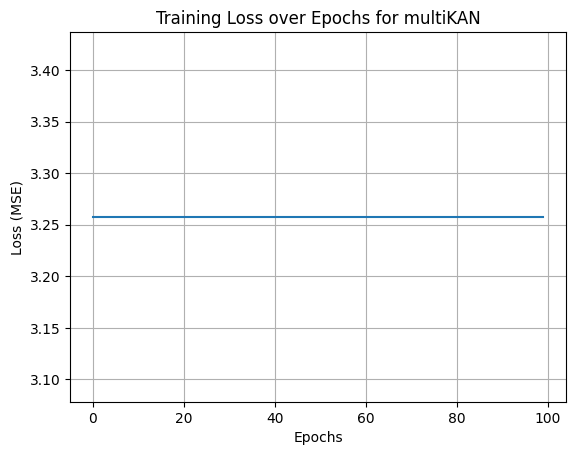

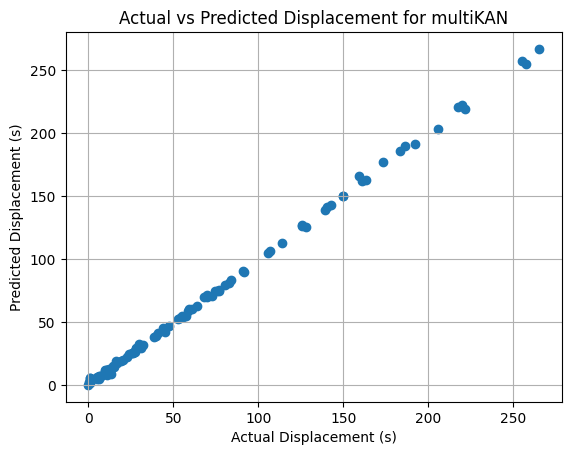

In [50]:
# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs for multiKAN")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement for multiKAN")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "multiKAN_model.pth")



In [51]:
# Calculate performance metrics
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1.3505
Mean Squared Error (MSE): 3.2575
Root Mean Squared Error (RMSE): 1.8049
R-Squared (R²): 0.9993


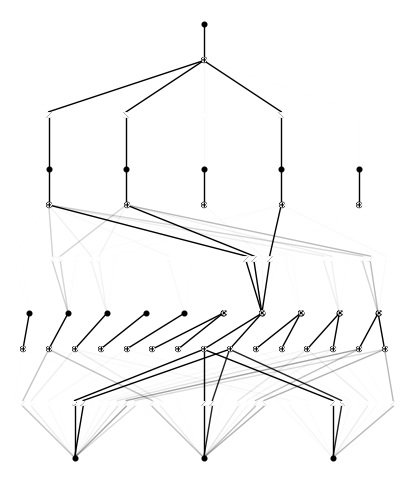

In [52]:
model.plot()

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.83e-01 | test_loss: 5.46e-01 | reg: 3.43e+01 | : 100%|█| 20/20 [00:02<00:00,  7.29it


saving model version 0.1
Epoch [10/20], Loss: 0.1771
Epoch [20/20], Loss: 0.1771


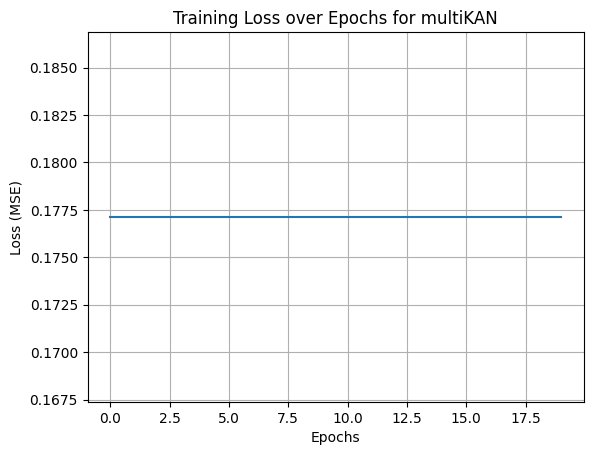

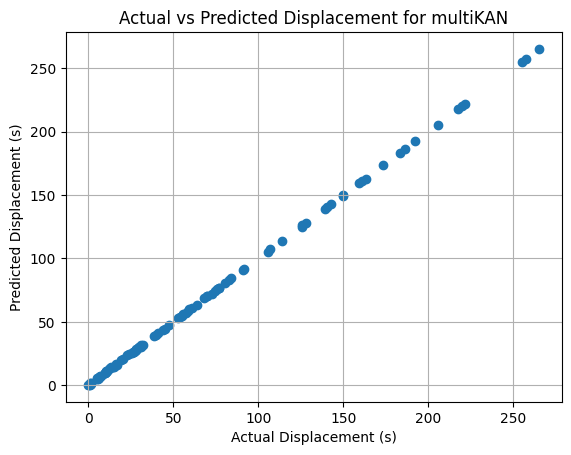

Mean Absolute Error (MAE): 0.3287
Mean Squared Error (MSE): 0.1771
Root Mean Squared Error (RMSE): 0.4209
R-Squared (R²): 1.0000


In [54]:

model = KAN(width=[3,[3,4],5,1], device=device)


model.fit(dataset, steps=20, lamb=0.001)


# Training the model
epochs = 20
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs for multiKAN")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement for multiKAN")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "multiKAN_model.pth")



# Calculate performance metrics
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


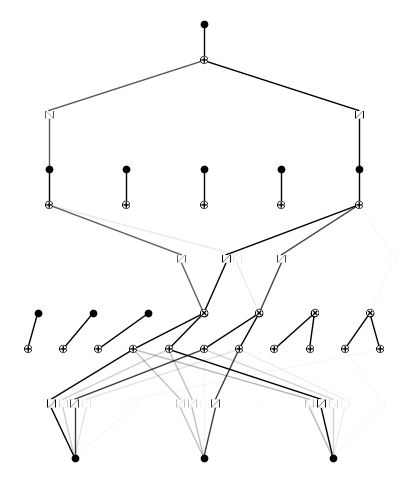

In [55]:
model.plot()

In [1]:
formula = model.symbolic_formula()[0][0]


NameError: name 'model' is not defined

In [ ]:
model.symbolic_formula()
